In [1]:
# check deslib version
import deslib
print(deslib.__version__)

0.3


# DCS With Overall Local Accuracy (OLA)

In [5]:
# evaluate dynamic classifier selection DCS-LA with overall local accuracy
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from deslib.dcs.ola import OLA
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = OLA()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.882 (0.010)


In [6]:
# make a prediction with DCS-LA using overall local accuracy
from sklearn.datasets import make_classification
from deslib.dcs.ola import OLA
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = OLA()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
yhat = model.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# DCS With Local Class Accuracy (LCA)

In [7]:
# evaluate dynamic classifier selection DCS-LA using local class accuracy
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from deslib.dcs.lca import LCA
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = LCA()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.920 (0.007)


In [8]:
# make a prediction with DCS-LA using local class accuracy
from sklearn.datasets import make_classification
from deslib.dcs.lca import LCA
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = LCA()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
yhat = model.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


# Explore k in k-Nearest Neighbor

>2 0.869 (0.011)
>3 0.876 (0.007)
>4 0.876 (0.009)
>5 0.878 (0.014)
>6 0.879 (0.011)
>7 0.884 (0.008)
>8 0.883 (0.011)
>9 0.883 (0.010)
>10 0.884 (0.011)
>11 0.884 (0.010)
>12 0.887 (0.007)
>13 0.886 (0.009)
>14 0.885 (0.011)
>15 0.888 (0.011)
>16 0.886 (0.008)
>17 0.886 (0.010)
>18 0.888 (0.008)
>19 0.885 (0.010)
>20 0.886 (0.011)
>21 0.889 (0.009)


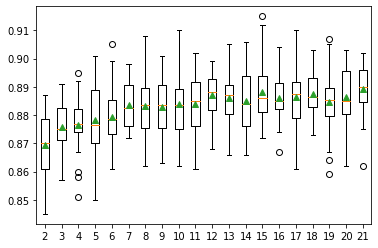

In [10]:
# explore k in knn for DCS-LA with overall local accuracy
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from deslib.dcs.ola import OLA
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for n in range(2,22):
		models[str(n)] = OLA(k=n)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Algorithms for Classifier Pool

In [15]:
# evaluate DCS-LA using OLA with a custom pool of algorithms
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deslib.dcs.ola import OLA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# define classifiers to use in the pool
classifiers = [

	XGBClassifier(),
	LogisticRegression(),
	DecisionTreeClassifier(),
	GaussianNB()]
# fit each classifier on the training set
for c in classifiers:
	c.fit(X_train, y_train)
# define the DCS-LA model
model = OLA(pool_classifiers=classifiers)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))
# evaluate contributing models
for c in classifiers:
	yhat = c.predict(X_test)
	score = accuracy_score(y_test, yhat)
	print('>%s: %.3f' % (c.__class__.__name__, score))

Accuracy: 0.973
>XGBClassifier: 0.973
>LogisticRegression: 0.878
>DecisionTreeClassifier: 0.884
>GaussianNB: 0.873


>2 0.969 (0.007)
>3 0.961 (0.006)
>4 0.952 (0.007)
>5 0.942 (0.007)
>6 0.930 (0.007)
>7 0.919 (0.009)
>8 0.906 (0.007)
>9 0.896 (0.010)
>10 0.886 (0.011)
>11 0.878 (0.011)
>12 0.867 (0.011)
>13 0.861 (0.012)
>14 0.852 (0.011)
>15 0.843 (0.011)
>16 0.840 (0.013)
>17 0.835 (0.012)
>18 0.829 (0.014)
>19 0.824 (0.013)
>20 0.816 (0.011)
>21 0.812 (0.014)


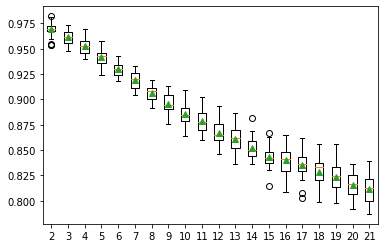

In [16]:
# explore k in knn for DCS-LA with overall local accuracy
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from deslib.dcs.ola import OLA
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for n in range(2,22):
		models[str(n)] = LCA(k=n)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [17]:
# evaluate DCS-LA using OLA with a custom pool of algorithms
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deslib.dcs.ola import OLA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# define classifiers to use in the pool
classifiers = [

	XGBClassifier(),
	LogisticRegression(),
	DecisionTreeClassifier(),
	GaussianNB()]
# fit each classifier on the training set
for c in classifiers:
	c.fit(X_train, y_train)
# define the DCS-LA model
model = LCA(pool_classifiers=classifiers)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))
# evaluate contributing models
for c in classifiers:
	yhat = c.predict(X_test)
	score = accuracy_score(y_test, yhat)
	print('>%s: %.3f' % (c.__class__.__name__, score))

Accuracy: 0.975
>XGBClassifier: 0.973
>LogisticRegression: 0.878
>DecisionTreeClassifier: 0.881
>GaussianNB: 0.873


In [23]:
# evaluate DCS-LA using OLA with a custom pool of algorithms
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deslib.dcs.ola import OLA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from xgboost import XGBClassifier, XGBRFClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# define classifiers to use in the pool
classifiers = [GaussianNB()]
# fit each classifier on the training set
for c in classifiers:
	c.fit(X_train,y_train)
# define the DCS-LA model
model = LCA(pool_classifiers=classifiers)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))
# evaluate contributing models
for c in classifiers:
	yhat = c.predict(X_test)
	score = accuracy_score(y_test, yhat)
	print('>%s: %.3f' % (c.__class__.__name__, score))

Accuracy: 0.873
>GaussianNB: 0.873
